# MNIST - Deep Learning: Multilayer Perceptron

Just like it was done in the previous sections 6. and 7., we are are going to work on the MNIST dataset. This time, deep learning in the shape of multilayer perceptrons (MLPs) will be used. Different types of architechtures and optimizers will be used.

## 0. Loading the Dataset

In [6]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Activation , Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

mnist = pd.read_csv("C:/Users\Multivac/6. Dataset - MNIST.csv", header=None)
mnist = np.array(mnist)

X = mnist[:,1:] / 255   #La estandarización aquí mejora la optimización (diapos), pero no tendremos problemas de distancias como antes. 
Y = mnist[:,0]          #Por ello, no usaremos scale; para poder visualizar mejor nuestras imágenes normalizaremos.
oneY = to_categorical(Y)

## 1. MLP - Adadelta Optimizer

###  1.1 No-Hidden-Layer Network

To test the accuracy of the simplest architecture, we build a network with no hidden layer. Still, the accuracy is surprisingly high and the training time short. We incluse plots of the temporal evolution

In [3]:
import time
start = time.time()

X_train,X_test,Y_train,Y_test = train_test_split(X,oneY,test_size=0.3)

model = keras.Sequential()
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy',  # https://stackoverflow.com/questions/47884862/keras-big-one-hot-encoding-binary-crossentropy-or-categorical-crossentropy
             optimizer=keras.optimizers.Adadelta(),  # https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
             metrics=['accuracy'])

arr = model.fit(X_train, Y_train,  # Arr mola porque te escupe toda la información del print
         batch_size=1024,  # https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
         epochs=200,  
         verbose=0,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
         validation_data=(X_test, Y_test))  # Con esto me saca, además de métricas de datos de train, para los datos de validación

score = model.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1],'\n')
model.summary()

Time spent to train the network: 41.2 seconds

Test loss: 0.30970150339603425
Test accuracy: 0.9166666666666666 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


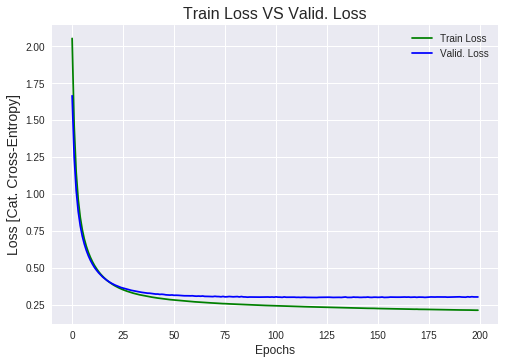

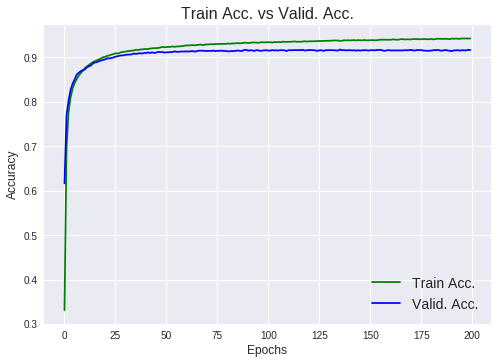

In [63]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr.history['loss'][:],     c="green")
plt.plot(arr.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr.history['acc'][:],     c="green")
plt.plot(arr.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 1.2 3-Layers Network

Now, keeping all other parameters identical, three layers will be added to the architechture. As it can be seen, the accuracy increases considerably: more complex and abstract features are coded in the deep layers, in a way that allows for finer classification.

In [4]:
import time
start = time.time()

X_train,X_test,Y_train,Y_test = train_test_split(X,oneY,test_size=0.3)

model2 = keras.Sequential()
model2.add(Dense(128, input_shape=(784,), activation="relu"))
model2.add(Dropout(0.2))  # https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer  ES UNA TÉCNICA DE REGULARIZACIÓN  -- Corta conexiones, de 0 a 1 x100
model2.add(Dense(64, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss='categorical_crossentropy',  # https://stackoverflow.com/questions/47884862/keras-big-one-hot-encoding-binary-crossentropy-or-categorical-crossentropy
             optimizer=keras.optimizers.Adadelta(),  # https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
             metrics=['accuracy'])

arr2 = model2.fit(X_train, Y_train,  # Arr mola porque te escupe toda la información del print
         batch_size=1024,  # https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network            https://www.degruyter.com/downloadpdf/j/itms.2017.20.issue-1/itms-2017-0003/itms-2017-0003.pdf
         epochs=200,  
         verbose=0,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
         validation_data=(X_test, Y_test))  # Con esto me saca, además de métricas de datos de train, para los datos de validación

score2 = model2.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1],'\n')
model2.summary()

Time spent to train the network: 66.07 seconds

Test loss: 0.18153640704972593
Test accuracy: 0.9666666666666667 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 111,146
Train

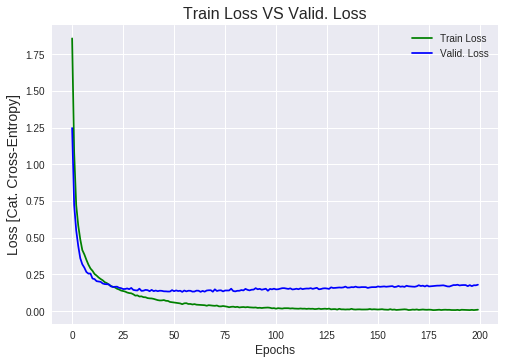

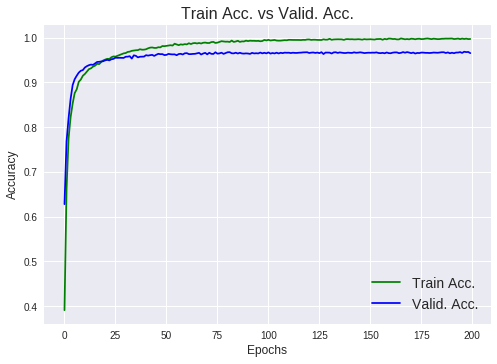

In [65]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr2.history['loss'][:],     c="green")
plt.plot(arr2.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr2.history['acc'][:],     c="green")
plt.plot(arr2.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 2 MLP - Stochastic Gradient Descent

### 2.1 No-Hidden-Layer Network

In [49]:
# Inicializamos el modelo.
model3 = tf.keras.Sequential()
model3.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model3.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',            
              metrics=['accuracy'])       


arr3 = model3.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 verbose=0,
                 epochs=200)

score3 = model3.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score3[0])
print('Test accuracy:', score3[1],'\n')
model3.summary()

Time spent to train the network: 303.64 seconds

Test loss: 0.3299523267944654
Test accuracy: 0.9086666666666666 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


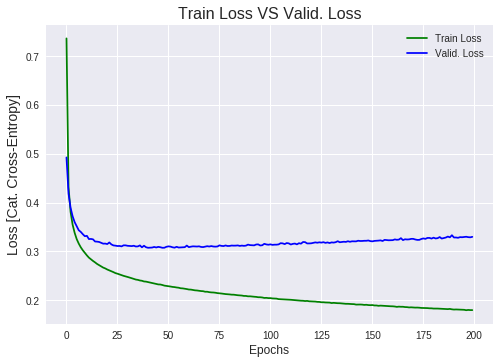

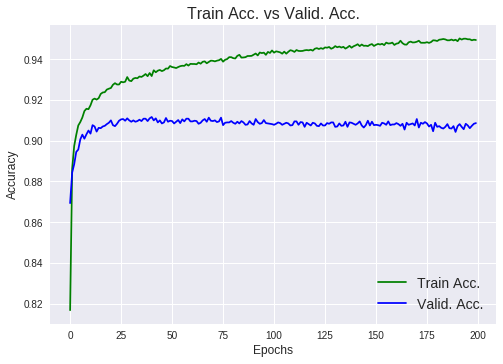

In [64]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr3.history['loss'][:],     c="green")
plt.plot(arr3.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc. vs Valid. Acc.",fontsize=16)
plt.plot(arr3.history['acc'][:],     c="green")
plt.plot(arr3.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 2.2 3-Layers Network

In [51]:
# Inicializamos el modelo.
model4 = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Dropout(0.2))
model4.add(Dense(128, activation='relu'))
# Add another:
model.add(Dropout(0.2))
model4.add(Dense(64,  activation='relu'))
# Add another:
model4.add(Dense(32,  activation='relu'))
# Add a softmax layer with 10 output units:
model4.add(Dense(10, activation='softmax'))

# Configure a model for mean-squared error regression.
model4.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',            
              metrics=['accuracy'])       


arr4 = model4.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 verbose=0,
                 epochs=200)

score4 = model4.evaluate(X_test, Y_test, verbose=0)

print('Time spent to train the network:', round(time.time() - start,2), 'seconds\n')
print('Test loss:', score4[0])
print('Test accuracy:', score4[1],'\n')
model4.summary()

Time spent to train the network: 631.86 seconds

Test loss: 0.22317493691415197
Test accuracy: 0.9651666666666666 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            multiple                  100480    
_________________________________________________________________
dense_101 (Dense)            multiple                  8256      
_________________________________________________________________
dense_102 (Dense)            multiple                  2080      
_________________________________________________________________
dense_103 (Dense)            multiple                  330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


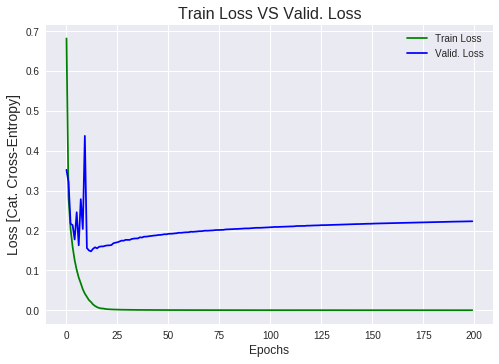

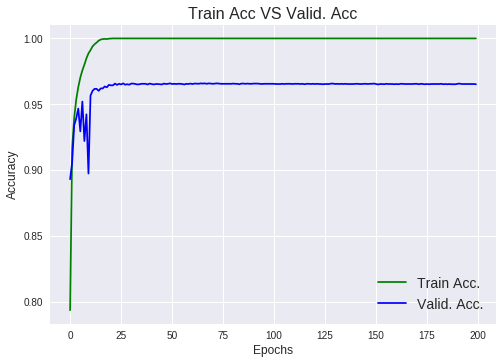

In [66]:
plt.title("Train Loss VS Valid. Loss",fontsize=16)
plt.plot(arr4.history['loss'][:],     c="green")
plt.plot(arr4.history['val_loss'][:], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss [Cat. Cross-Entropy]',fontsize=14)
plt.show()

plt.title("Train Acc VS Valid. Acc",fontsize=16)
plt.plot(arr4.history['acc'][:],     c="green")
plt.plot(arr4.history['val_acc'][:], c="blue" )
plt.legend(['Train Acc.', 'Valid. Acc.'],fontsize=14)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.show()

## 3. Visualization

### 3.1 Visualizing the Classification

Now that the accuracy values have been acquired, finding in model2 from Section 2.1 the best model with a 96.66% accuracy, we can visualize how our network classifies.  

In order to do so, we will take the entire dataset and label the diferent elements according to the network output. Afterwards, we will average all images with the same label. The result is quite ashtonishing and can be seen in the following image.

(20000,)


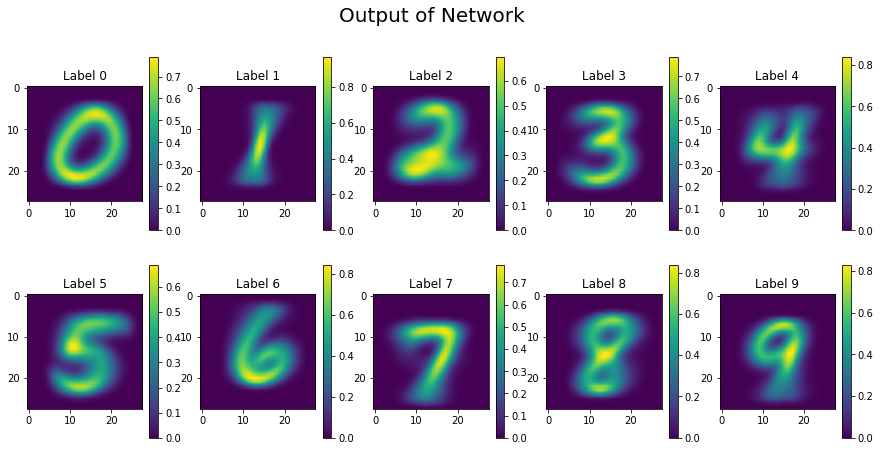

In [7]:
Yp=[]
for i in range(np.shape(X)[0]):
  yp=model2.predict(X[i:i+1,:])
  Yp.append(np.argmax(yp))
Yp=np.array(Yp)
print(np.shape(Yp))

fig=plt.figure(figsize=(15,7))

for i in range(10):
  labeled = X[Yp==i,:]
  meanlabeled=[np.mean(labeled[:,i]) for i in range(np.shape(X)[1])]
  meanlabeled=np.array(meanlabeled)
  ax1 = fig.add_subplot(2,10/2,i+1)
  plt.imshow(meanlabeled.reshape(28,28),cmap='viridis',interpolation='bilinear')
  plt.title('Label '+str(i))
  plt.colorbar()
plt.suptitle('Output of Network',fontsize=20)
plt.show()

### 3.1 Visualizing the Errors

Of course, the network does not have a 100% accuracy. But, are the errors reasonable? Could a human also fail in some of these digits? Let us take 100 random digits and see what the network guesses wrong.

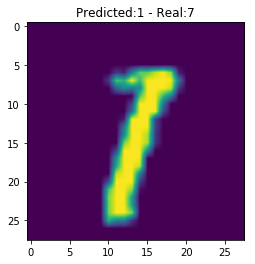

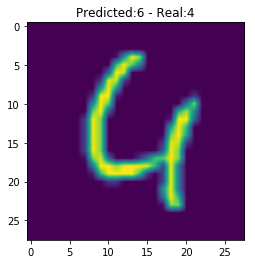

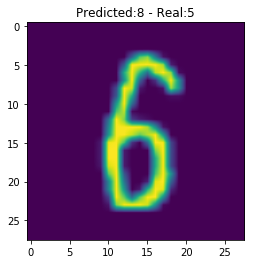

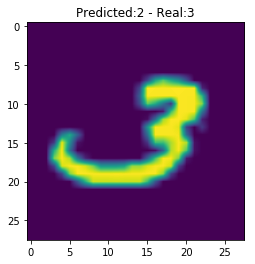

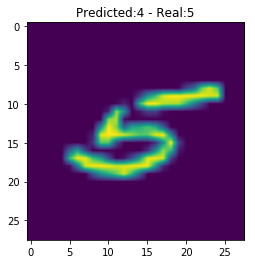

In [10]:
import numpy.random

# Predecimos las etiquetas de 100 valores elegidos aleatoriamente.
idxs = np.random.choice(X_test.shape[0], 100, replace=False)
lbls = np.argmax(model.predict(X_test[idxs,:]), axis=1)

# Y guardamos los índices de las predicciones incorrectas.
wrong = idxs[np.argmax(Y_test[idxs], axis=1) != lbls]    #Usamos argmax ya que tenemos onehot encoding!!! Esto nos da la posición, y en consecuencia, la etiqueta numérica.

for i in wrong: 
  plt.imshow(X_test[i,:].reshape(28, 28),interpolation='bilinear',cmap='viridis')
  plt.title("Predicted:" + str(np.argmax(model.predict(X_test[i:i+1,:]))) + " - Real:" + str(np.argmax(Y_test[i:i+1,:])))
  plt.show()

As it can be seen, all errors are quite reasonable; even another human might fail in some of them. Still, the architechture can be improved and made more complex. We will explore further improvements in upcoming works.